# This notebook recreates the plots in the paper

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import emcee
import scipy.stats as sps
from tqdm import trange
from isochrones.mist import MIST_Isochrone
mist = MIST_Isochrone()

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Produce plots for the simulated data.

Load the simulated data set.

In [2]:
df = pd.read_csv("simulated_data.csv")
true_age_gyr = (10**df.age.values)*1e-9

Load samples

In [3]:
savedir = "simulation_results/iso_and_gyro"
meds, stds, age_samps, resids, errp, errm = [], [], [], [], [], []
N = 5

for i in range(N):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:  # , "r") as f:
            samples = f["samples"][...]
            age_samps.append((10**samples[:, 1])*1e-9)
            resids.append(list(np.array(age_samps[i]) - true_age_gyr[i]))
            meds.append(np.median(age_samps[i]))
            stds.append(np.std(age_samps[i]))
            upper = np.percentile(age_samps[i], 84)
            lower = np.percentile(age_samps[i], 16)
            errp.append(upper-meds[i])
            errm.append(meds[i]-lower)
meds, stds, errp, errm = np.array(meds), np.array(stds), np.array(errp), np.array(errm)

[]
[]


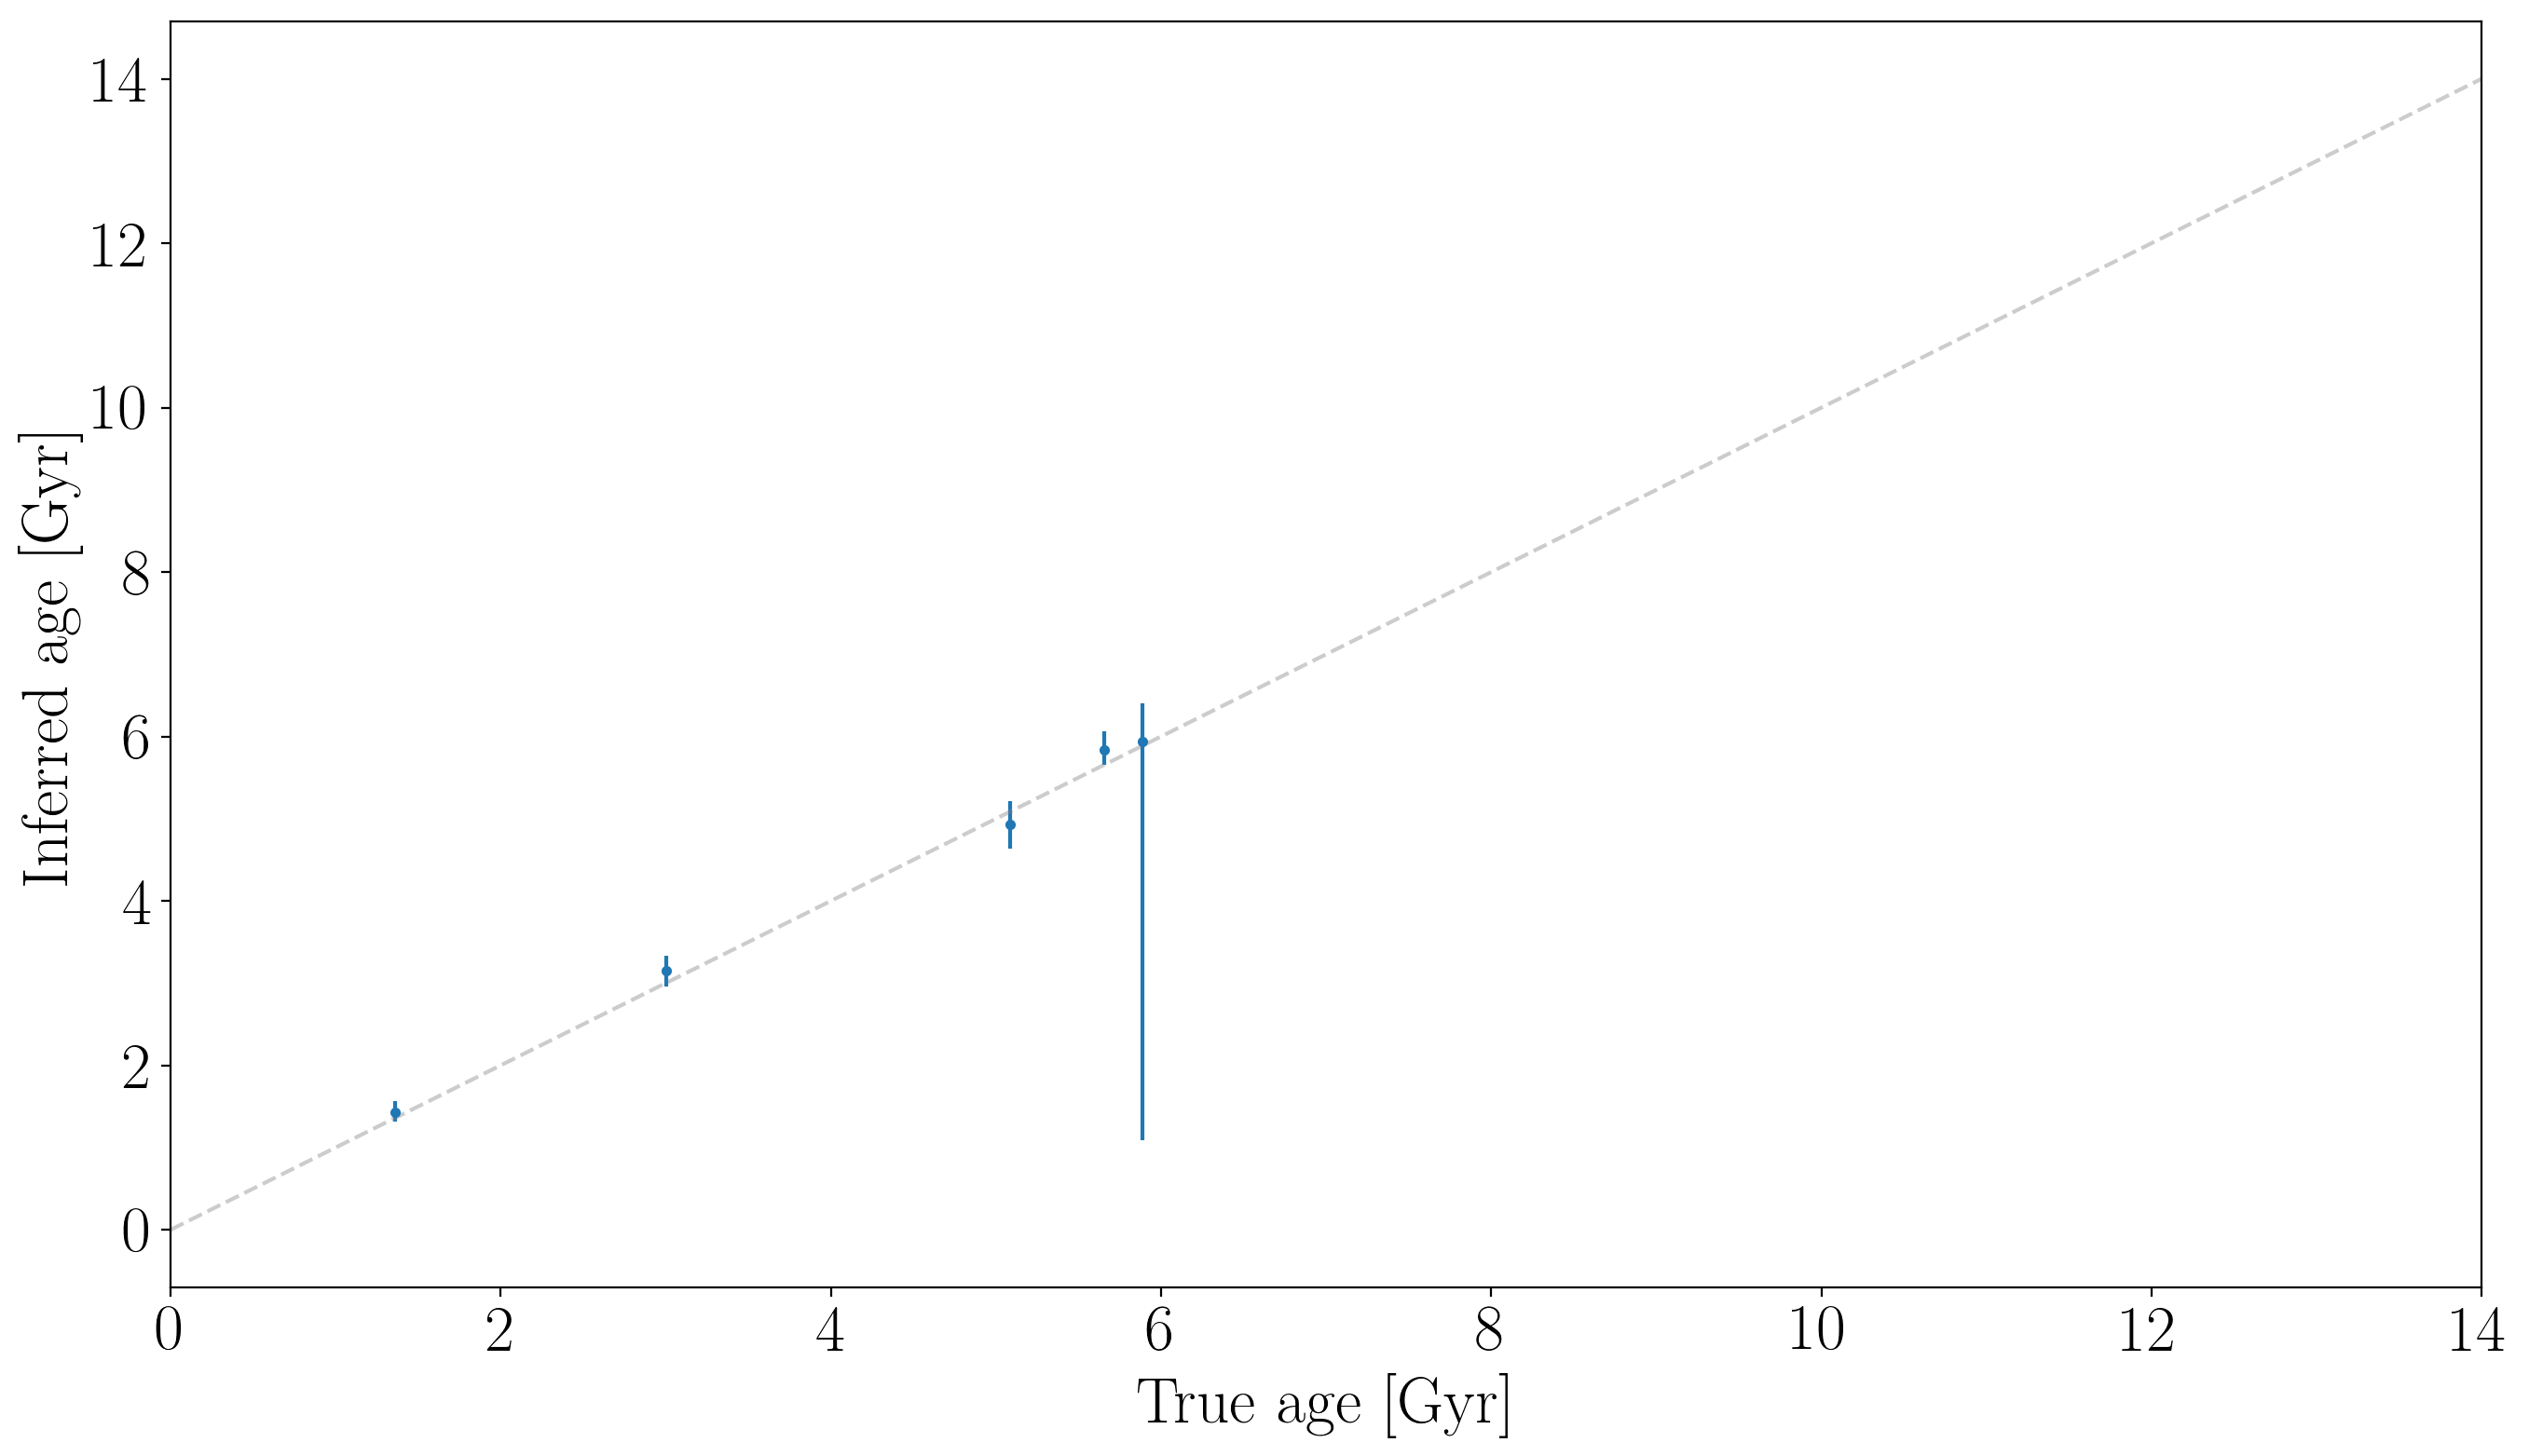

In [4]:
plt.figure(figsize=(16, 9), dpi=200)
plt.errorbar(true_age_gyr[:N], meds, yerr=[errm, errp], fmt=".")

m = meds < true_age_gyr[:N] - .1*true_age_gyr[:N]
print(np.arange(N)[m])
print(true_age_gyr[:N][m])
plt.errorbar(true_age_gyr[:N][m], meds[m], yerr=[errm[m], errp[m]], fmt=".", color="tab:orange")
# plt.errorbar(true_age_gyr[:N][m], meds[m], yerr=stds[m], fmt=".", color="tab:orange")
             
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
plt.savefig("iso_and_gyro.pdf")

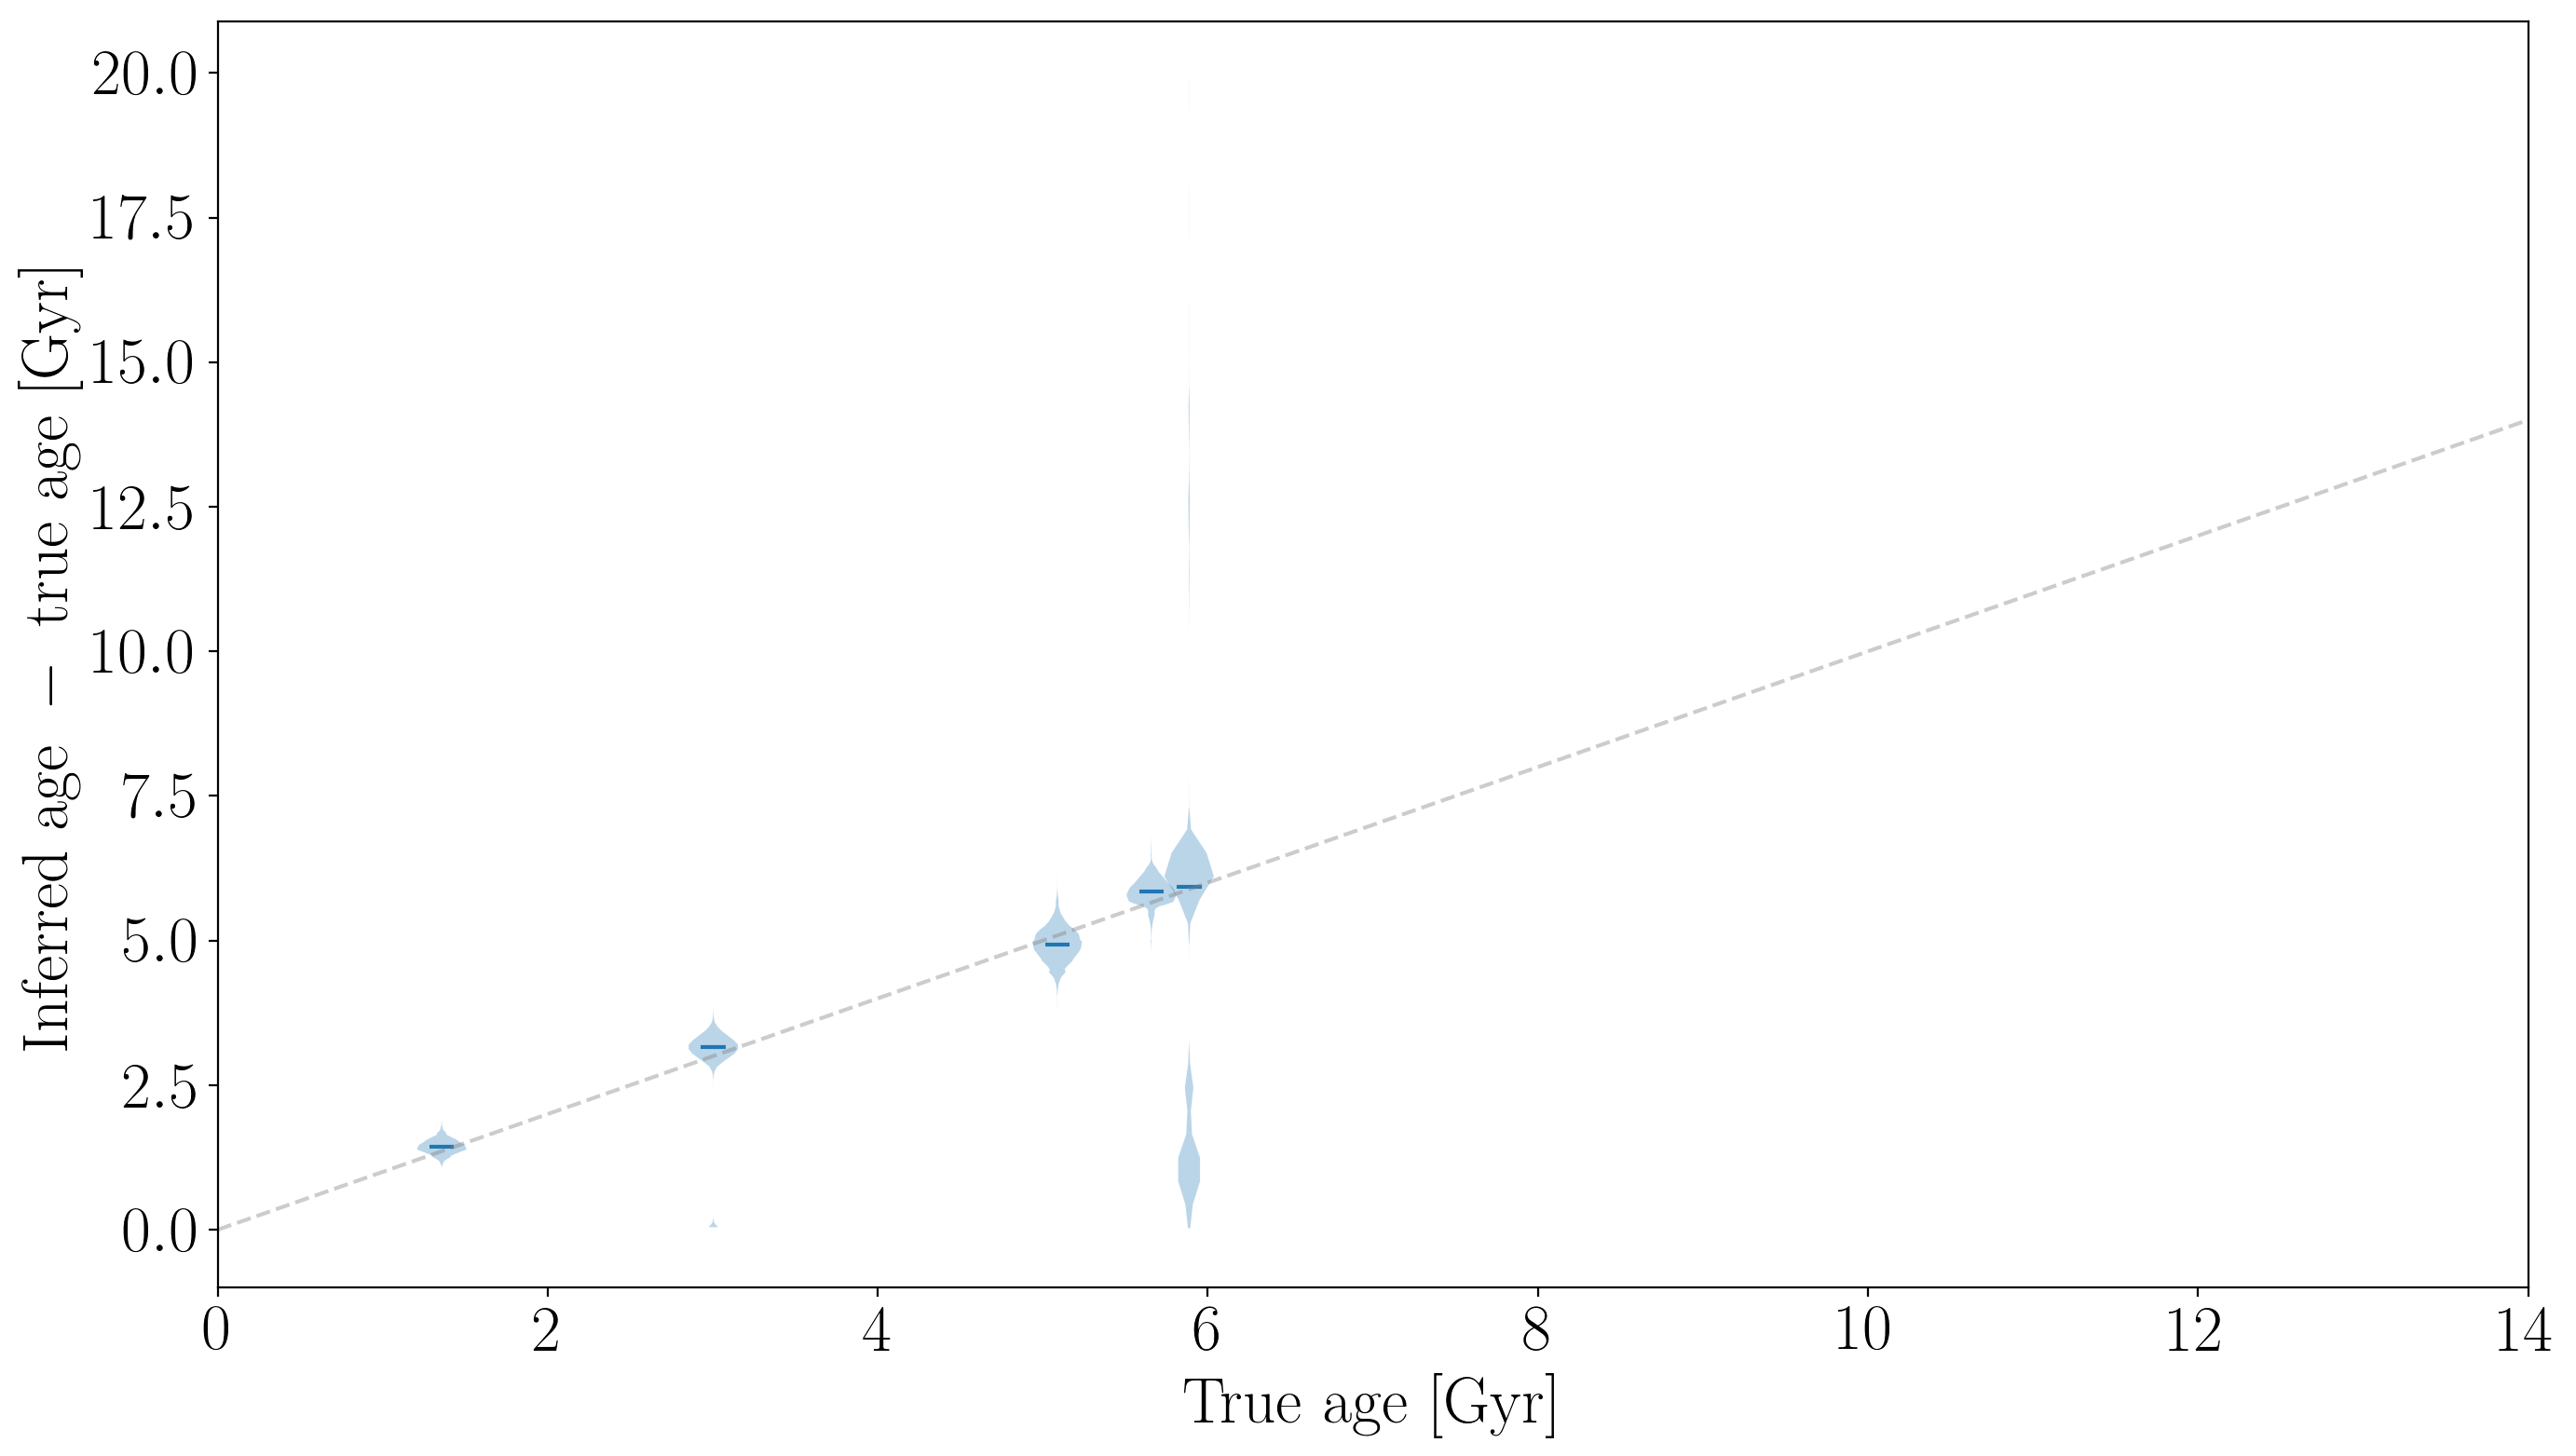

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=200)

# axes.violinplot(resids, true_age_gyr[:N], points=50, widths=0.3, 
#                 showmeans=False, showextrema=False, showmedians=False)
axes.violinplot(age_samps, true_age_gyr[:N], points=50, widths=0.3,
                showmeans=False, showextrema=False, showmedians=True)
#       age_samps-true_age_gyr[:N]       
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~-~true~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
# plt.plot(xs, np.zeros(len(xs)), ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
# plt.ylim(-4, 2)
plt.savefig("iso_and_gyro_violin.pdf")

Now just the isochrone model.

In [7]:
savedir = "simulation_results/iso_only"
meds_iso, stds_iso, age_samps_iso, resids_iso, errp, errm = [], [], [], [], [], []
N_iso = 5

for i in range(N_iso):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:
            samples_iso = f["samples"][...]
            age_samps_iso.append((10**samples_iso[:, 1])*1e-9)
            resids_iso.append(list(np.array(age_samps_iso[i]) - true_age_gyr[i]))
            meds_iso.append(np.median(age_samps_iso[i]))
            stds_iso.append(np.std(age_samps_iso[i]))
            upper = np.percentile(age_samps_iso[i], 84)
            lower = np.percentile(age_samps_iso[i], 16)
            errp.append(upper)# - meds[i])
            errm.append(lower)
meds_iso, stds_iso = np.array(meds_iso), np.array(stds_iso)

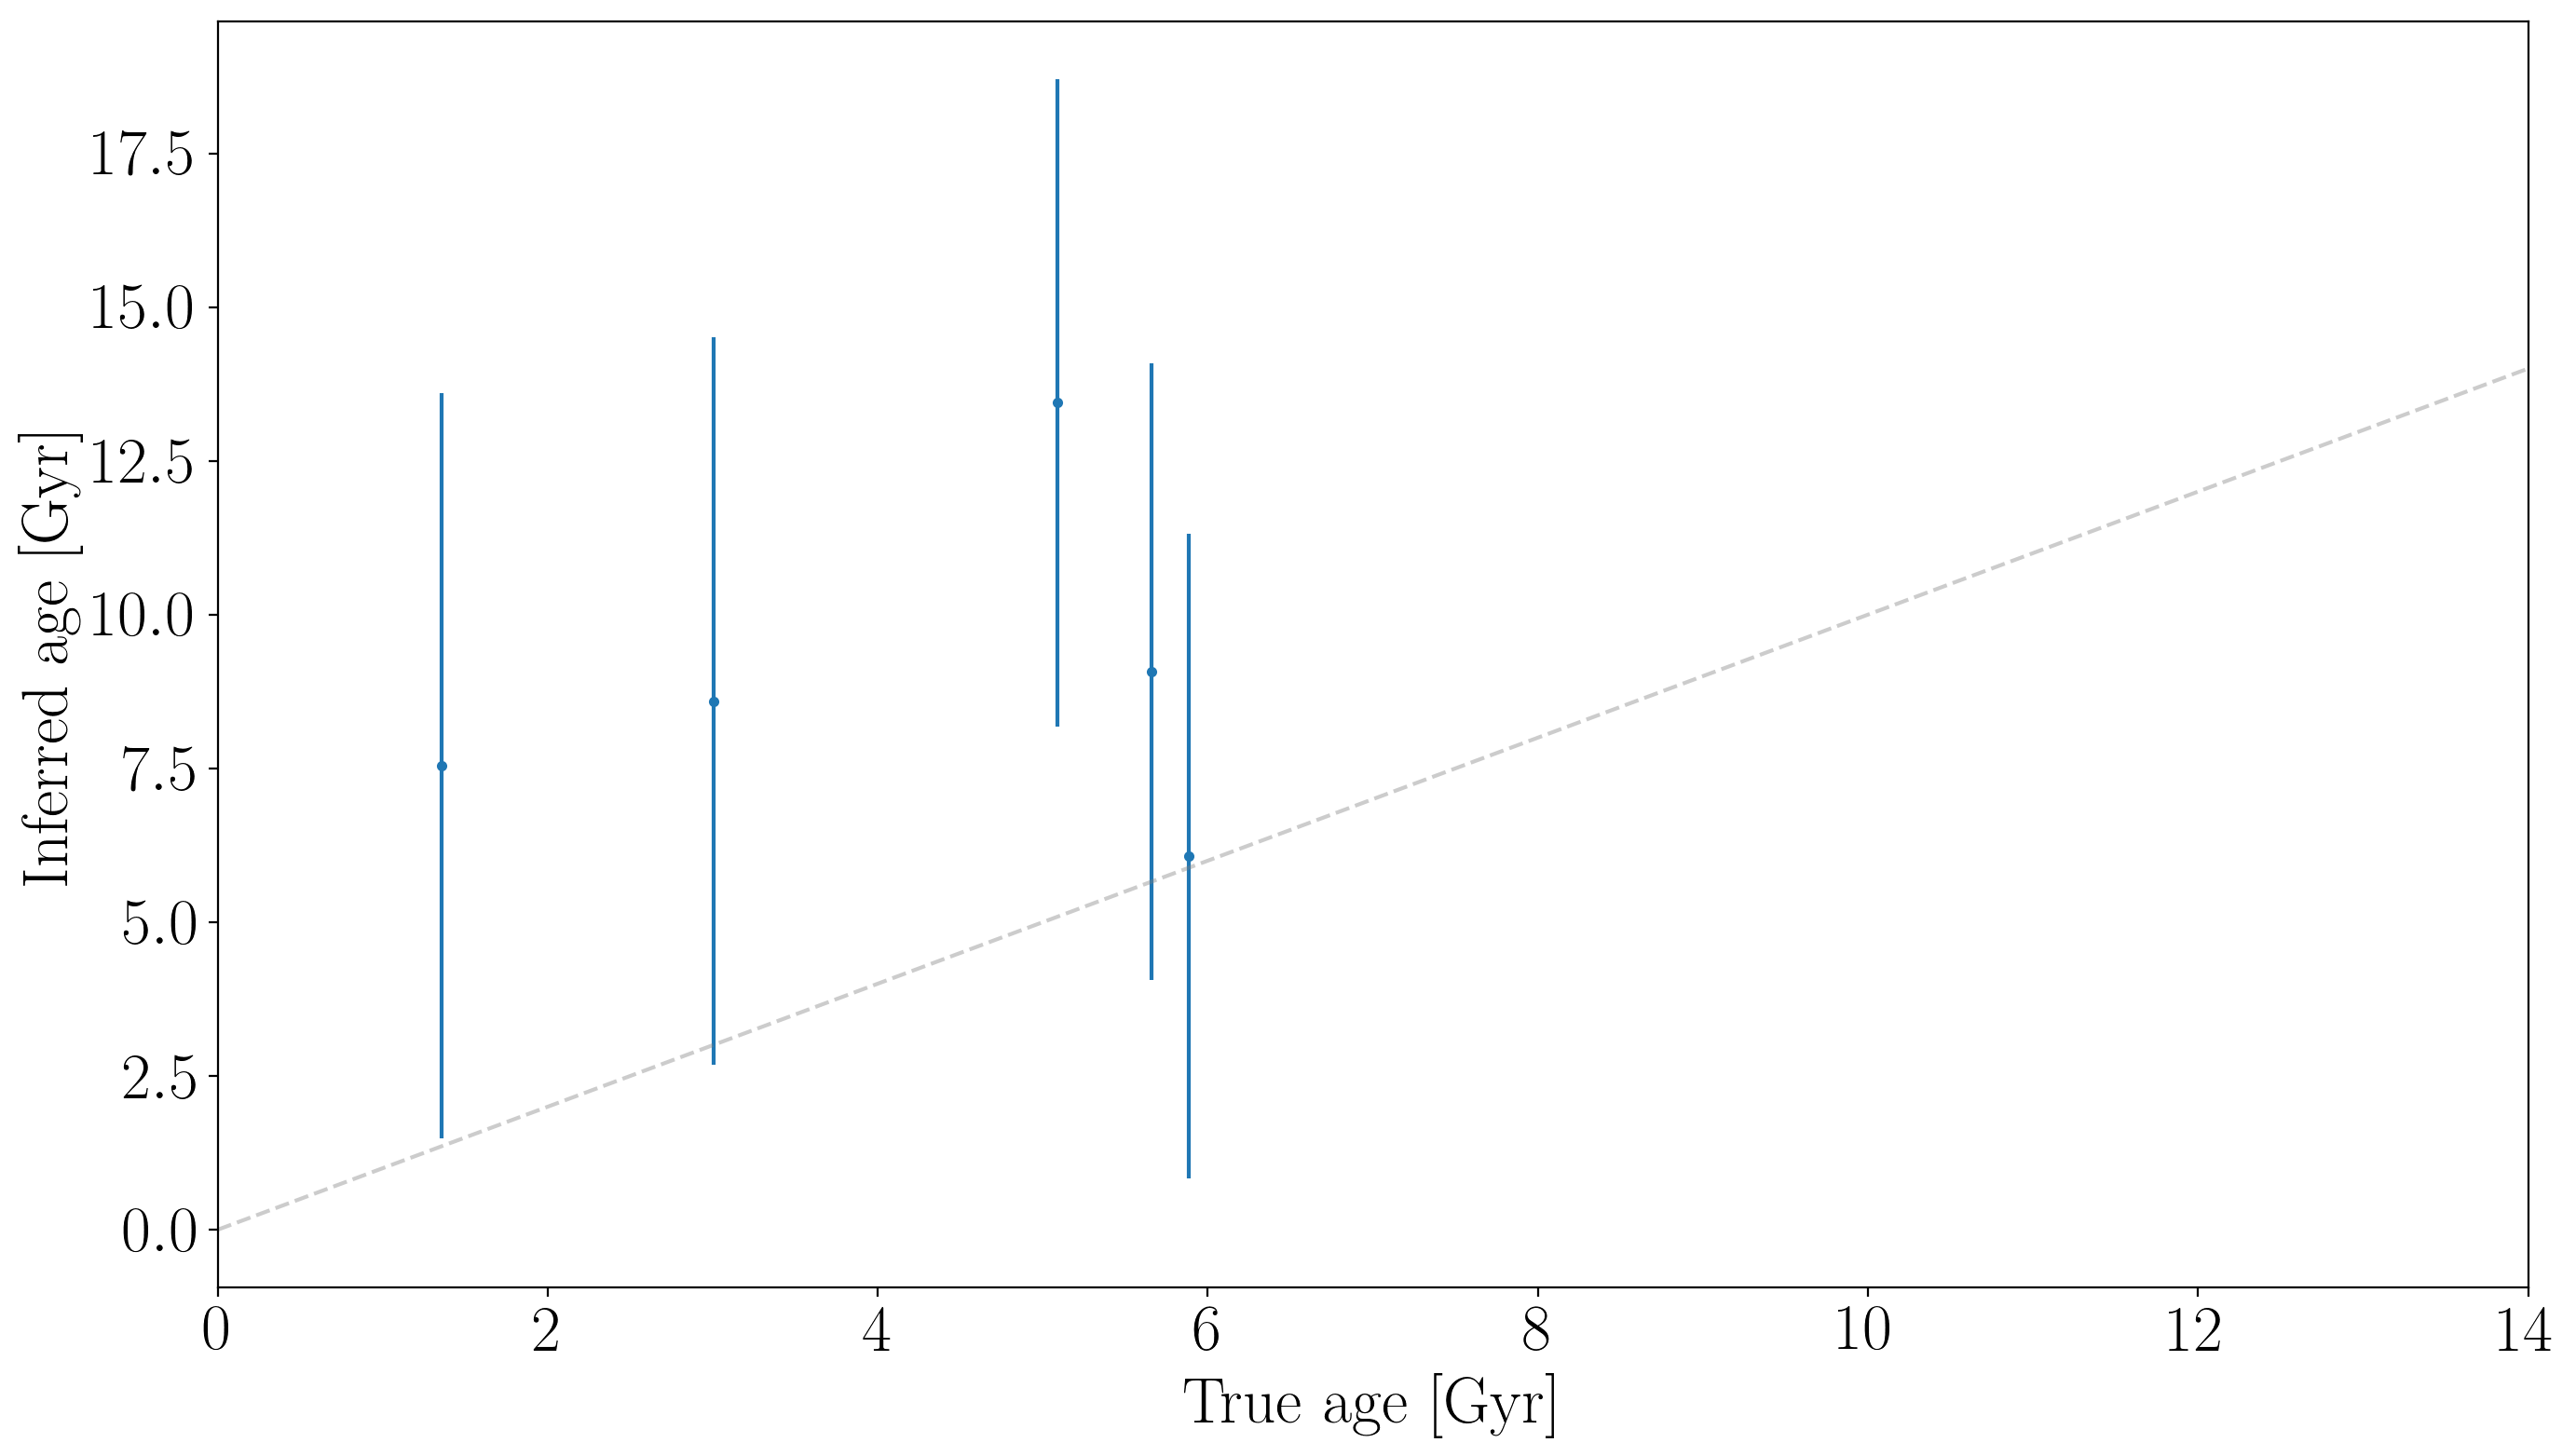

In [8]:
plt.figure(figsize=(16, 9), dpi=200)
# plt.errorbar((10**df.age.values[:N_iso])*1e-9, meds_iso, yerr=stds_iso, fmt=".")
plt.errorbar((10**df.age.values[:N_iso])*1e-9, meds_iso, yerr=stds_iso, fmt=".")
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
plt.savefig("iso_only.pdf")

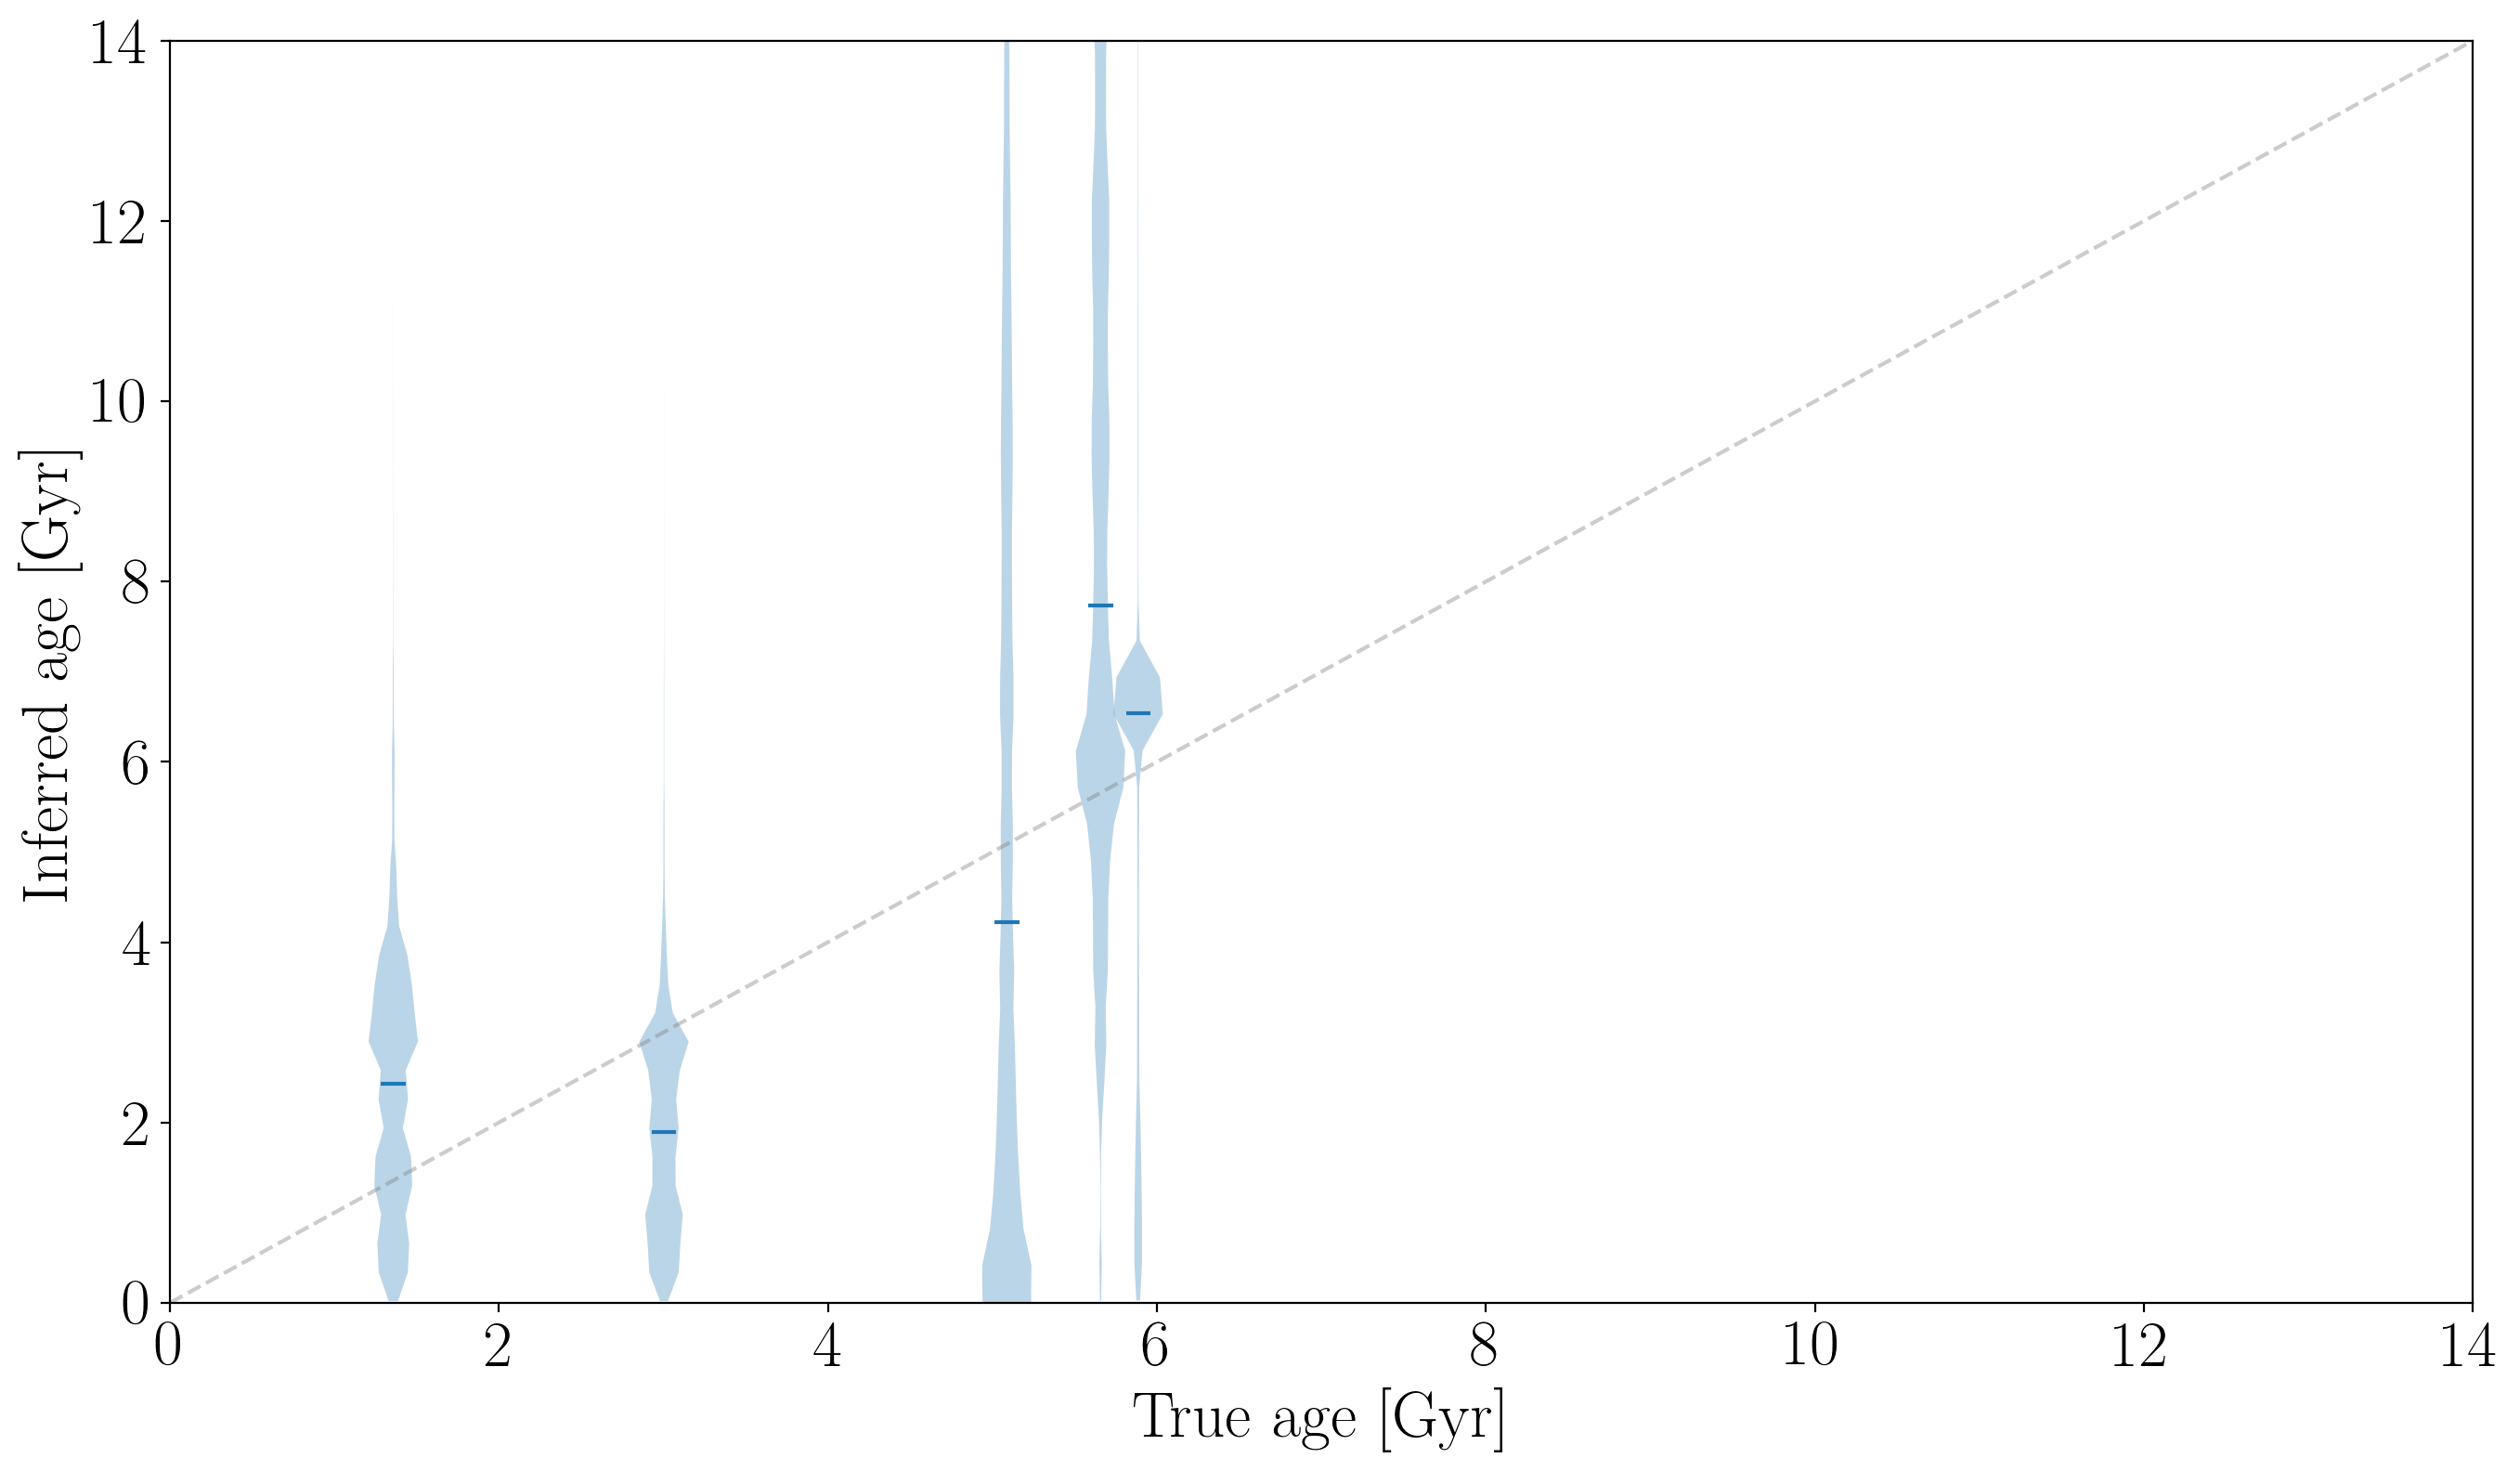

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=200)
mm = m[:N_iso]
axes.violinplot(age_samps_iso, true_age_gyr[:N_iso], points=50, widths=0.3,
                showmeans=False, showextrema=False, showmedians=True)
# axes.violinplot(age_samps_iso[mm], true_age_gyr[:N_iso][mm], points=50, widths=0.3, color="tab:orange",
#                 showmeans=False, showextrema=False, showmedians=False)
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)
plt.ylim(0, 14)
plt.savefig("iso_only_violin.pdf")

Now just the gyrochronology model.

In [9]:
savedir = "simulation_results/gyro_only"
meds_gyro, stds_gyro = [], []
N = 80
for i in range(N):
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "r") as f:
            samples = f["samples"][...]
            age_samps = (10**samples[:, 1])*1e-9
            meds_gyro.append(np.median(age_samps))
            stds_gyro.append(np.std(age_samps))

(0, 14)

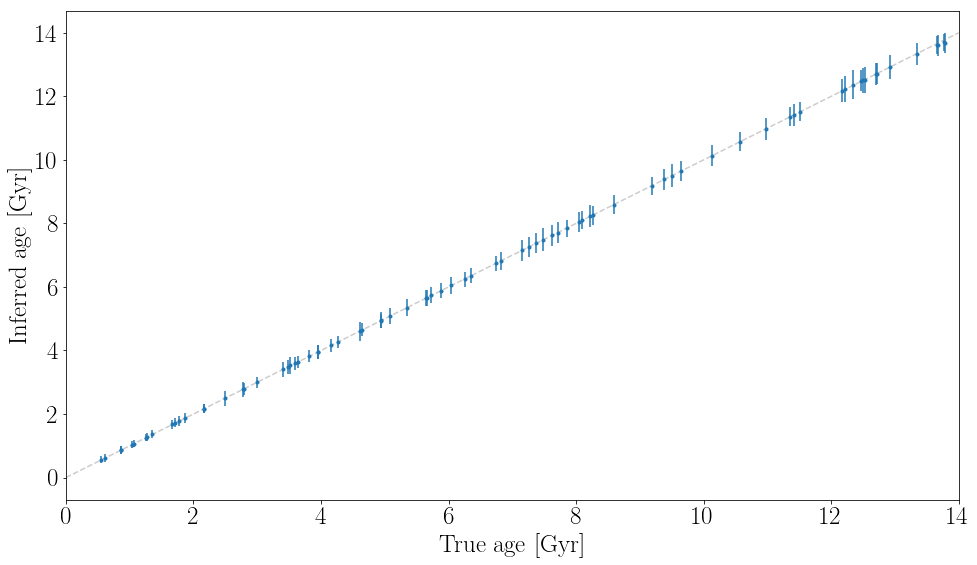

In [10]:
plt.figure(figsize=(16, 9))
plt.errorbar((10**df.age.values[:N])*1e-9, meds_gyro, yerr=stds_gyro, fmt=".")
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Inferred~age~[Gyr]}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, ".5", ls="--", alpha=.4)
plt.xlim(0, 14)

# Now load results from Cluster runs.

In [11]:
savedir = "cluster_results/iso_and_gyro"
meds, stds, age_samps, resids, errp, errm = [], [], [], [], [], []
mass_samps, feh_samps, dist_samps, av_samps = [], [], [], []
N = 19

for i in trange(N):
    fname = "{0}/{1}_samples.h5".format(savedir, str(i).zfill(4))
    
    reader = emcee.backends.HDFBackend(fname, read_only=True)
    flatchain = reader.get_chain(flat=True)

    mass_samps.append(flatchain[10000:, 0])
    feh_samps.append(flatchain[10000:, 2])
    dist_samps.append(flatchain[10000:, 3])
    av_samps.append(flatchain[10000:, 4])
    age_samps.append((10**flatchain[10000:, 1])*1e-9)
    resids.append(list(np.array(age_samps[i]) - .65))
    meds.append(np.median(age_samps[i]))
    stds.append(np.std(age_samps[i]))
    upper = np.percentile(age_samps[i], 84)
    lower = np.percentile(age_samps[i], 16)
    errp.append(upper-meds[i])
    errm.append(meds[i]-lower)
    
meds, stds, errp, errm = np.array(meds), np.array(stds), np.array(errp), np.array(errm)

100%|██████████| 19/19 [00:32<00:00,  1.10it/s]


In [16]:
savedir = "cluster_results/iso_only"
meds_iso, stds_iso, age_samps_iso, resids_iso, errp_iso, errm_iso = [], [], [], [], [], []
mass_samps_iso, feh_samps_iso, dist_samps_iso, av_samps_iso = [], [], [], []
N_iso = 5

for i in trange(N_iso):
    fname = "{0}/{1}_samples.h5".format(savedir, str(i).zfill(4))
    
    reader = emcee.backends.HDFBackend(fname, read_only=True)
    flatchain_iso = reader.get_chain(flat=True)

    mass_samps_iso.append(flatchain_iso[10000:, 0])
    feh_samps_iso.append(flatchain_iso[10000:, 2])
    dist_samps_iso.append(flatchain_iso[10000:, 3])
    av_samps_iso.append(flatchain_iso[10000:, 4])
    age_samps_iso.append((10**flatchain_iso[10000:, 1])*1e-9)
    resids_iso.append(list(np.array(age_samps_iso[i]) - .65))
    meds_iso.append(np.median(age_samps_iso[i]))
    stds_iso.append(np.std(age_samps_iso[i]))
    upper = np.percentile(age_samps_iso[i], 84)
    lower = np.percentile(age_samps_iso[i], 16)
    errp_iso.append(upper-meds[i])
    errm_iso.append(meds[i]-lower)
    
meds_iso, stds_iso, errp_iso, errm_iso = np.array(meds_iso), np.array(stds_iso), np.array(errp_iso), np.array(errm_iso)

100%|██████████| 5/5 [00:18<00:00,  3.60s/it]


100%|██████████| 5/5 [00:13<00:00,  2.68s/it]


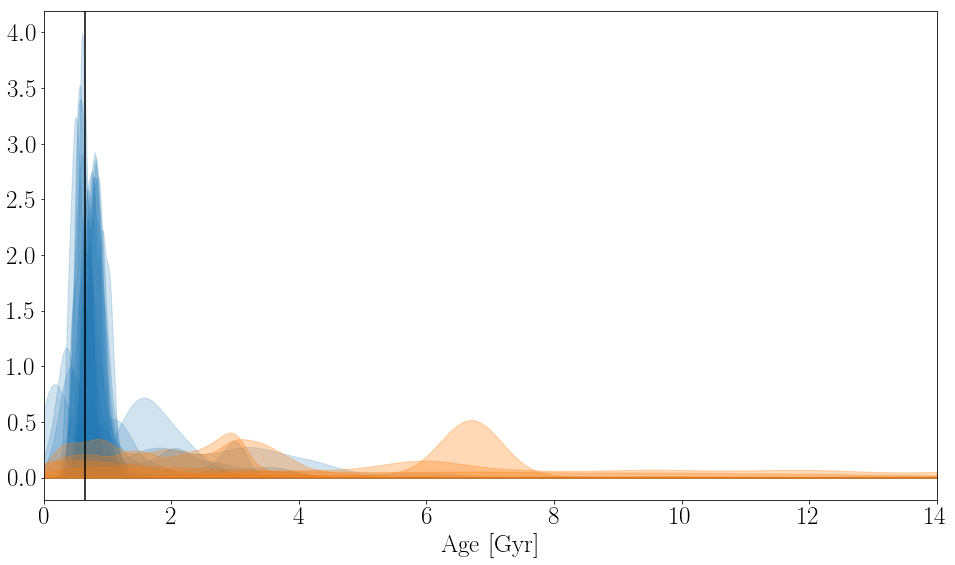

In [17]:
xs = np.linspace(0, 14, 1000)
plt.figure(figsize=(16, 9))
    
for i in trange(N):
    kernel = sps.gaussian_kde(age_samps[i][::100])
    plt.fill_between(xs, xs*0, kernel.evaluate(xs), alpha=.2, color="tab:blue")    

for i in trange(N_iso):
    kernel_iso = sps.gaussian_kde(age_samps_iso[i][::100])
    plt.fill_between(xs, xs*0, kernel_iso.evaluate(xs), alpha=.3, color="tab:orange")

plt.axvline(.65, color="k")
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.xlim(0, 14)
plt.savefig("../plots/cluster_ages.pdf")
# plt.ylim(0, 1)

100%|██████████| 3/3 [00:09<00:00,  3.21s/it]


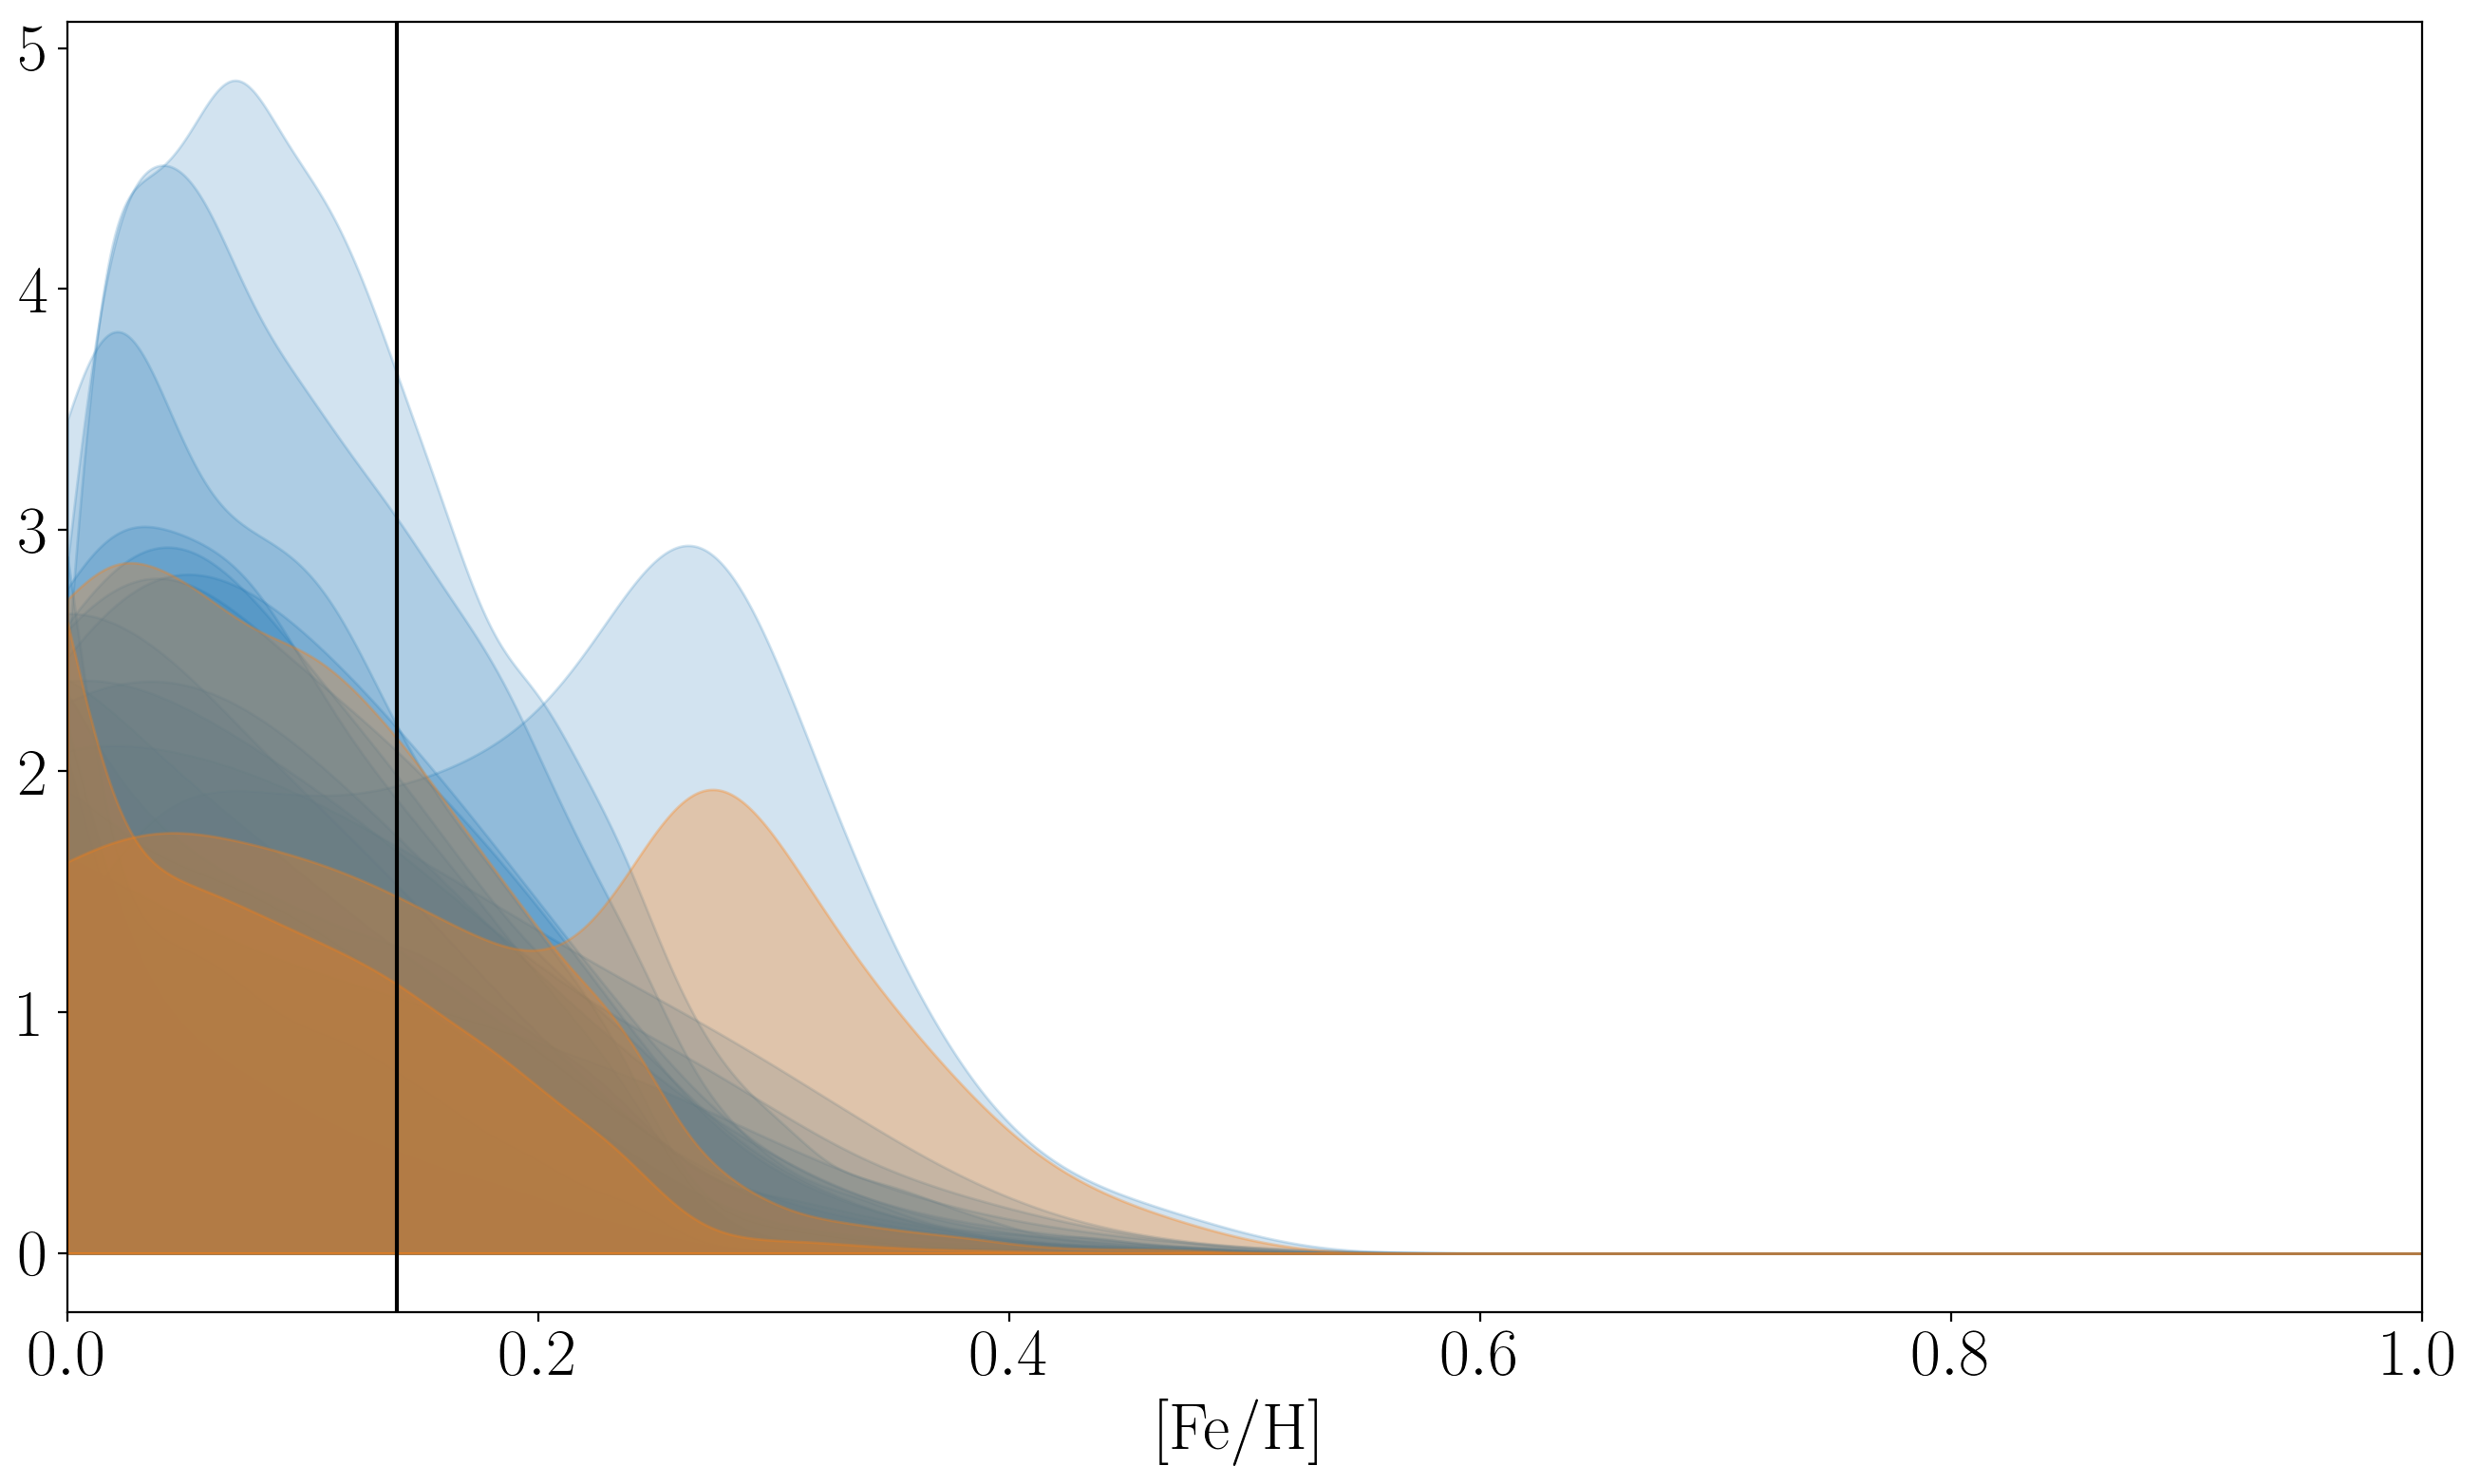

In [15]:
xs = np.linspace(0, 1, 1000)
plt.figure(figsize=(16, 9), dpi=200)
    
for i in trange(N):
    kernel = sps.gaussian_kde(feh_samps[i][::100])
    plt.fill_between(xs, xs*0, kernel.evaluate(xs), alpha=.2, color="tab:blue")
    
for i in trange(N_iso):
    kernel_iso = sps.gaussian_kde(feh_samps_iso[i][::100])
    plt.fill_between(xs, xs*0, kernel_iso.evaluate(xs), alpha=.3, color="tab:orange")

plt.axvline(.14, color="k")
plt.xlabel("$\mathrm{[Fe/H]}$")
plt.xlim(0, 1)
plt.savefig("../plots/cluster_fehs.pdf")
# plt.ylim(0, 1)

100%|██████████| 5/5 [00:07<00:00,  1.57s/it]


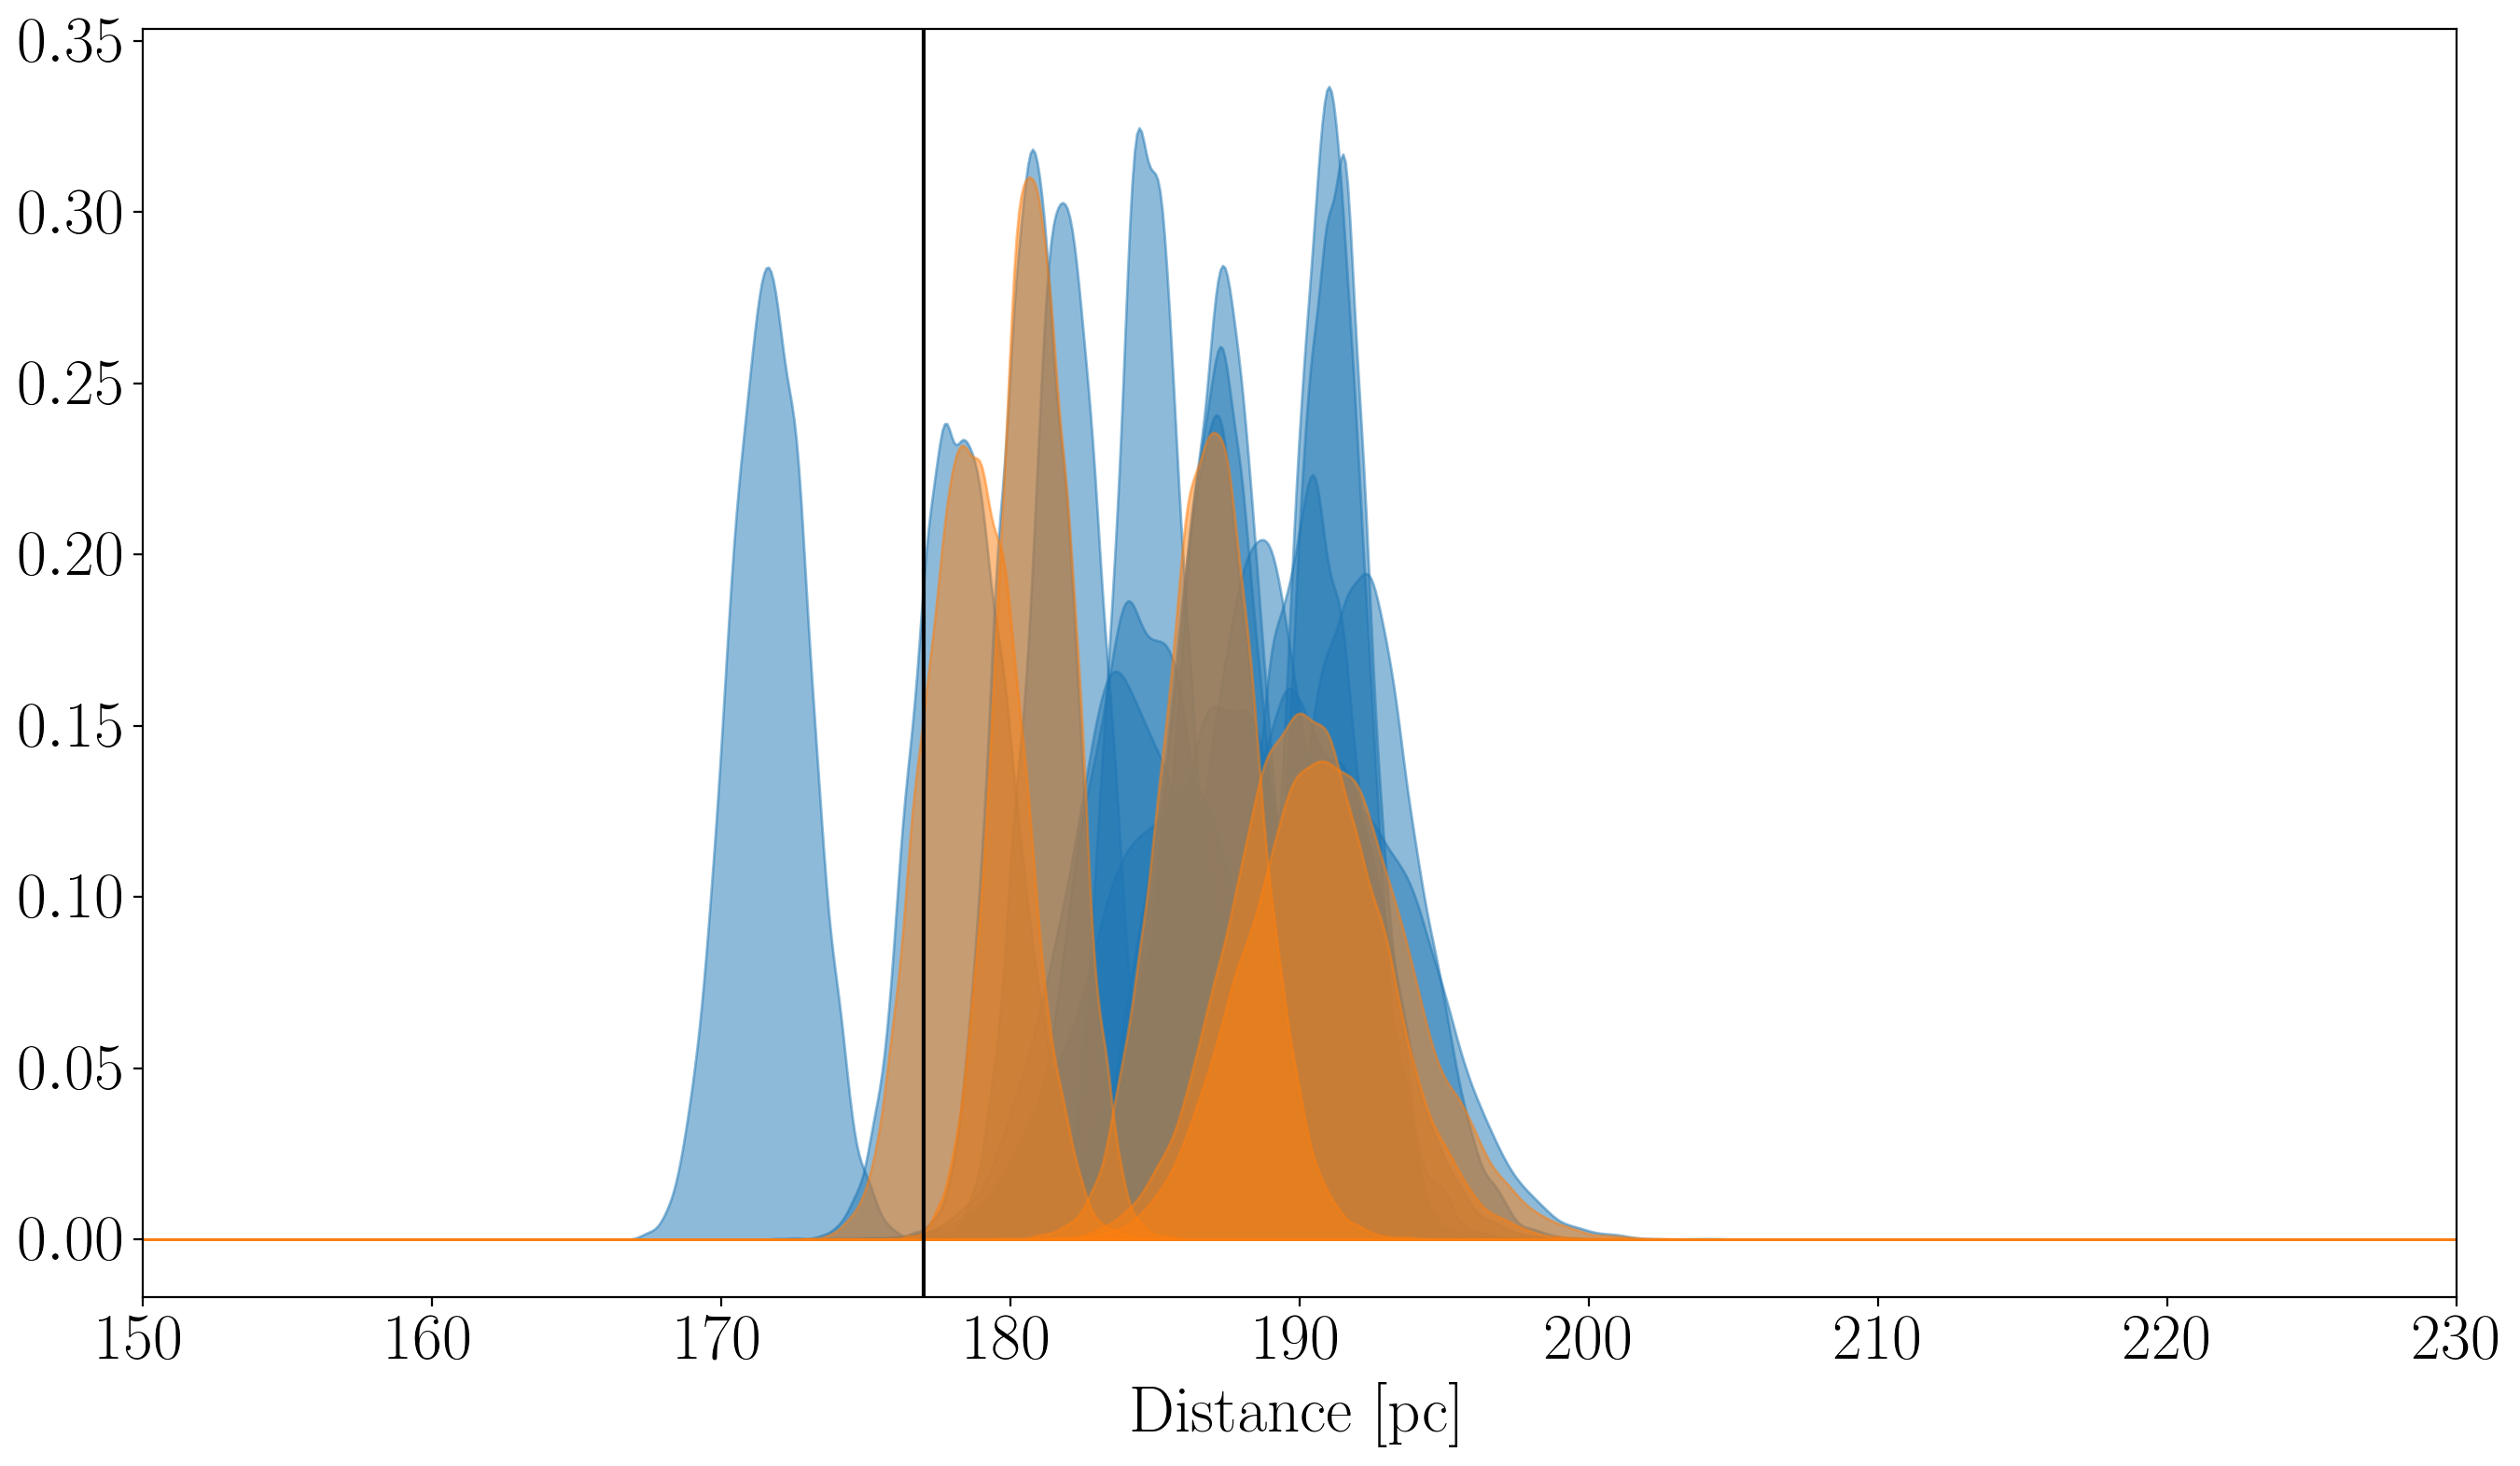

In [18]:
xs = np.linspace(150, 230, 1000)
plt.figure(figsize=(16, 9), dpi=200)
    
for i in trange(N):
    kernel = sps.gaussian_kde(np.exp(dist_samps[i][::100]))
    plt.fill_between(xs, xs*0, kernel.evaluate(xs), alpha=.5, color="tab:blue")

for i in trange(N_iso):
    kernel_iso = sps.gaussian_kde(np.exp(dist_samps_iso[i][::100]))
    plt.fill_between(xs, xs*0, kernel_iso.evaluate(xs), alpha=.5, color="tab:orange")
    
plt.axvline(177, color="k")
plt.xlabel("$\mathrm{Distance~[pc]}$")
plt.xlim(150, 230)
plt.savefig("../plots/cluster_distances.pdf")

100%|██████████| 5/5 [00:15<00:00,  3.45s/it]


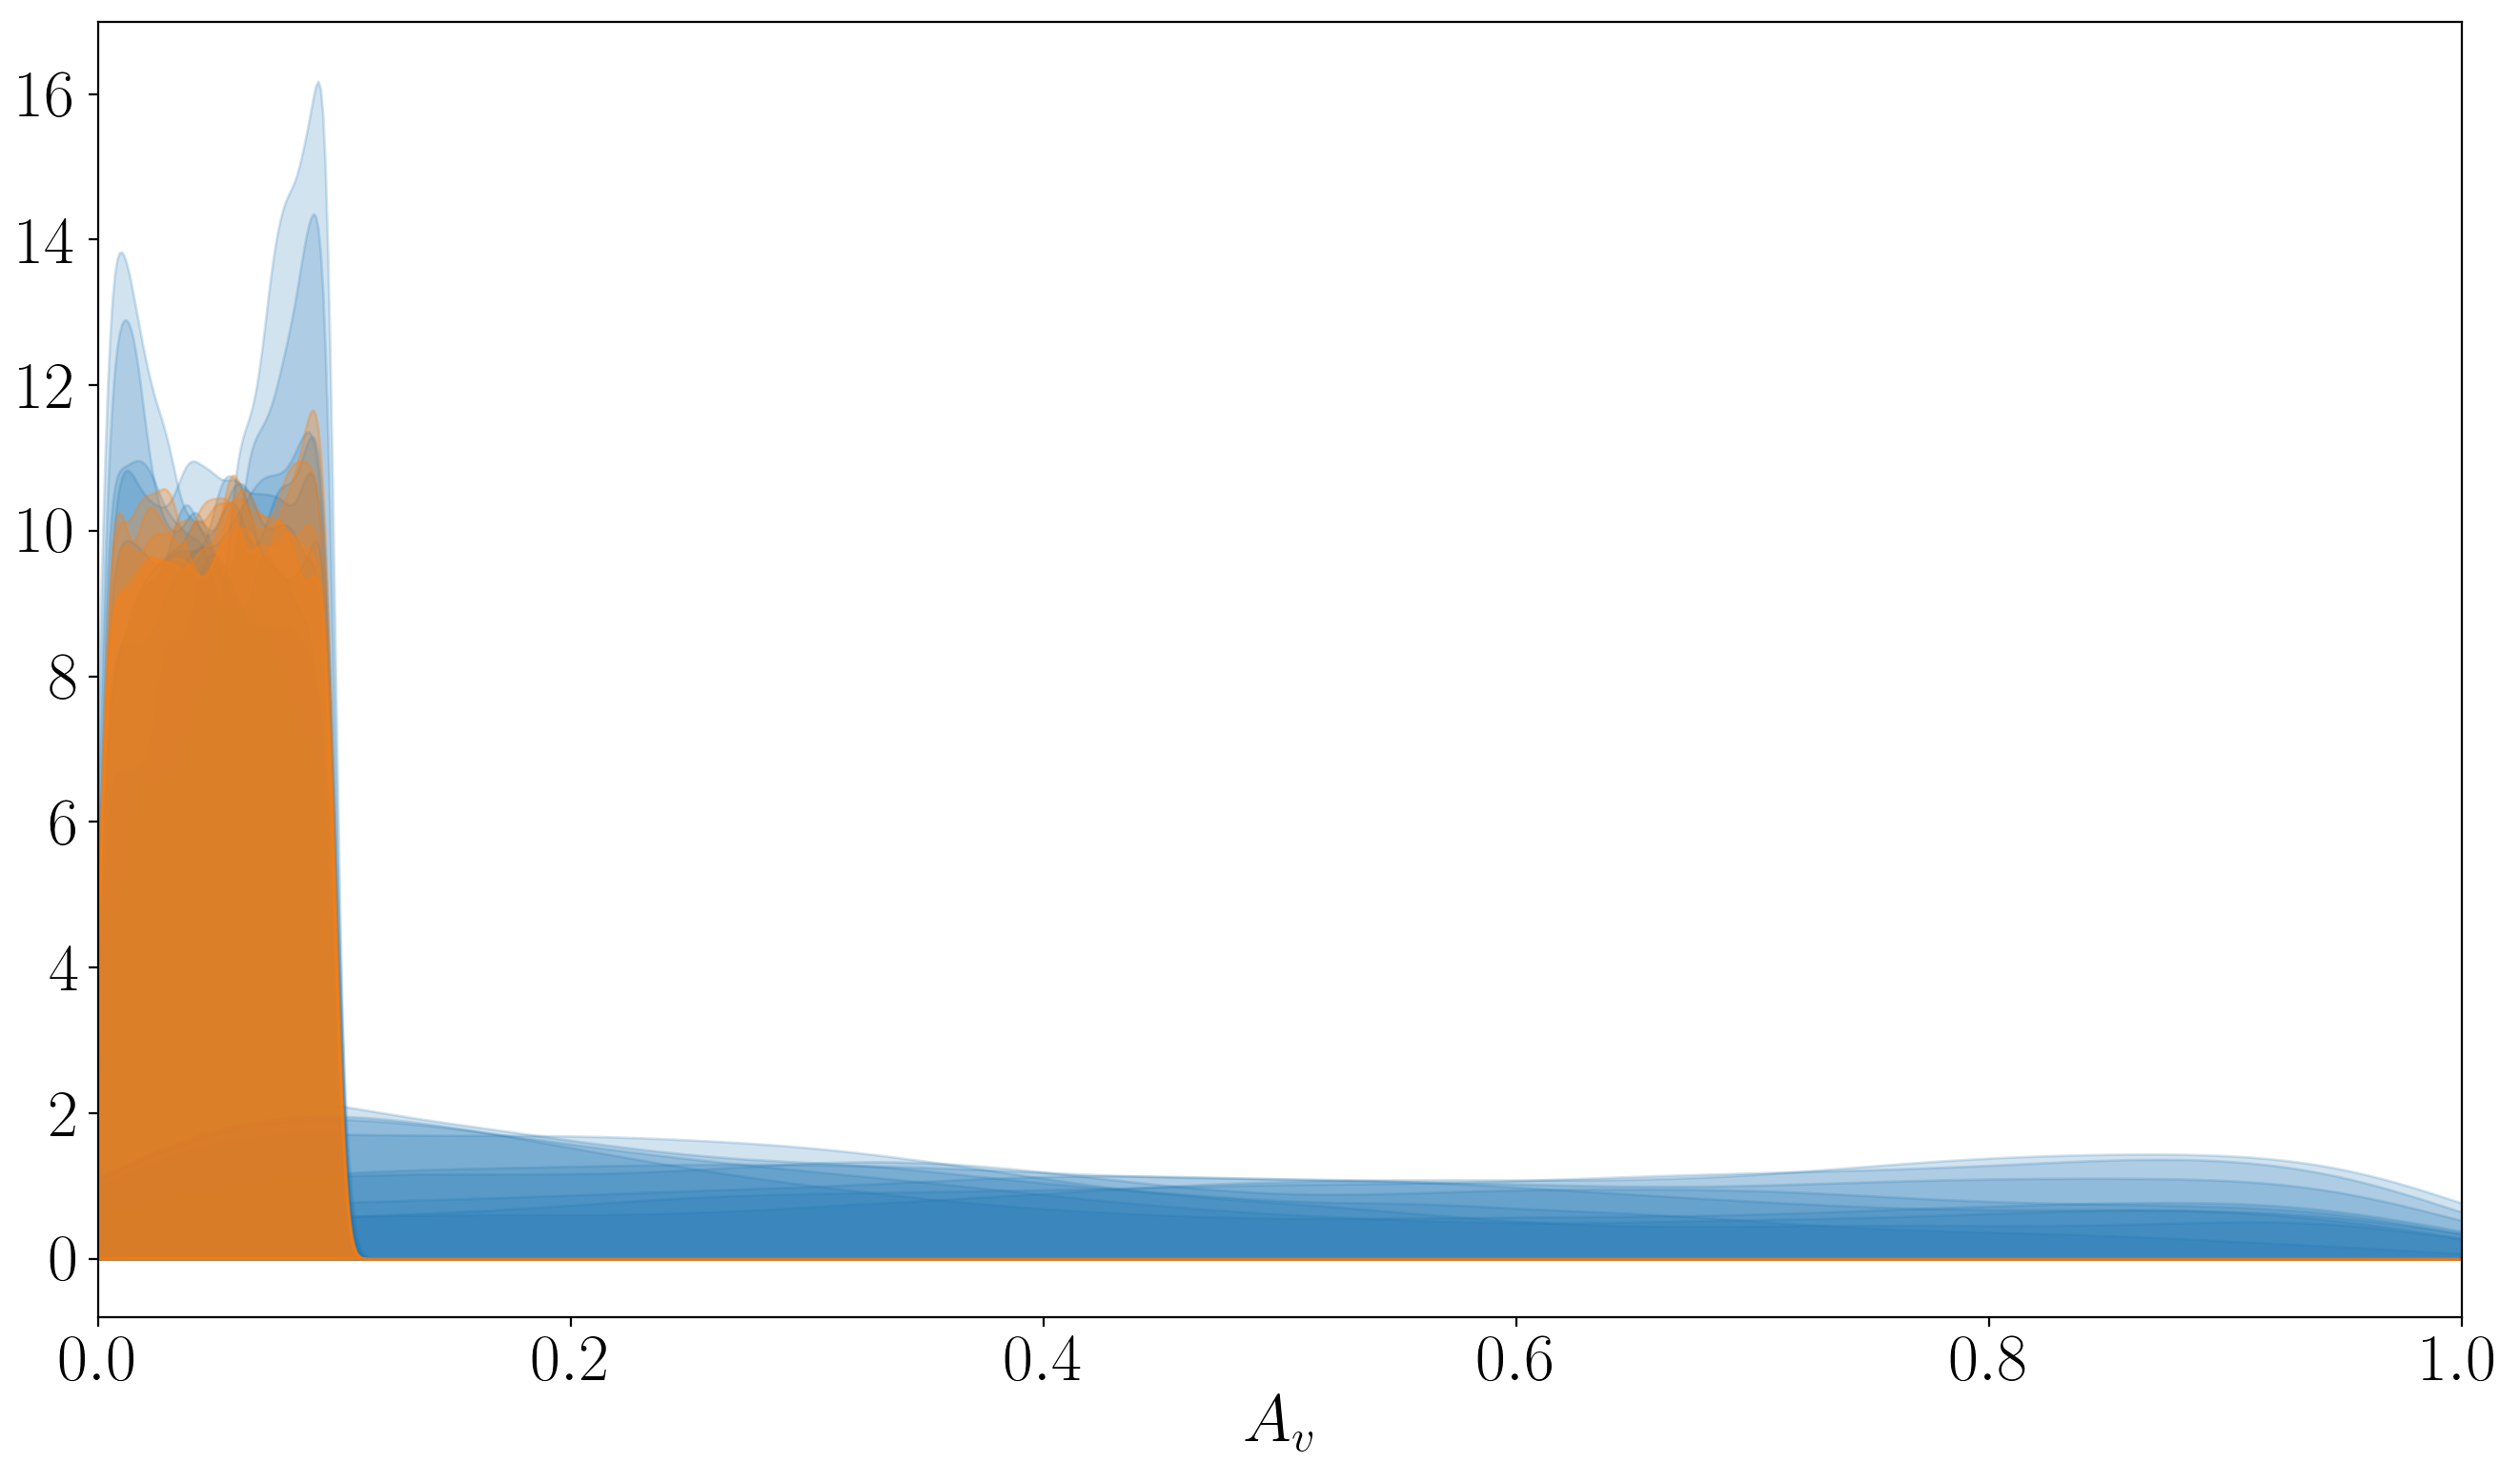

In [19]:
xs = np.linspace(0, 1, 1000)
plt.figure(figsize=(16, 9), dpi=200)

for i in trange(N):
    kernel = sps.gaussian_kde(av_samps[i][::100])
    plt.fill_between(xs, xs*0, kernel.evaluate(xs), alpha=.2, color="tab:blue")

for i in trange(N_iso):
    kernel_iso = sps.gaussian_kde(av_samps_iso[i][::100])
    plt.fill_between(xs, xs*0, kernel_iso.evaluate(xs), alpha=.3, color="tab:orange")    
    
plt.xlabel("$A_v$")
plt.xlim(0, 1)
plt.savefig("../plots/cluster_avs.pdf")

  5%|▌         | 1/19 [00:01<00:34,  1.90s/it]

<class 'numpy.ndarray'> (501,)


 11%|█         | 2/19 [00:04<00:33,  1.97s/it]

<class 'numpy.ndarray'> (35,)


 16%|█▌        | 3/19 [00:06<00:31,  1.99s/it]

<class 'numpy.ndarray'> (0,)


 21%|██        | 4/19 [00:07<00:27,  1.86s/it]

<class 'numpy.ndarray'> (56,)


 26%|██▋       | 5/19 [00:10<00:29,  2.08s/it]

<class 'numpy.ndarray'> (0,)


 32%|███▏      | 6/19 [00:11<00:25,  1.98s/it]

<class 'numpy.ndarray'> (0,)


 37%|███▋      | 7/19 [00:14<00:27,  2.29s/it]

<class 'numpy.ndarray'> (0,)


 42%|████▏     | 8/19 [00:17<00:25,  2.30s/it]

<class 'numpy.ndarray'> (0,)


 47%|████▋     | 9/19 [00:21<00:27,  2.74s/it]

<class 'numpy.ndarray'> (0,)


 53%|█████▎    | 10/19 [00:22<00:22,  2.48s/it]

<class 'numpy.ndarray'> (796,)


 58%|█████▊    | 11/19 [00:25<00:20,  2.51s/it]

<class 'numpy.ndarray'> (0,)


 63%|██████▎   | 12/19 [00:27<00:15,  2.21s/it]

<class 'numpy.ndarray'> (0,)


 68%|██████▊   | 13/19 [00:29<00:13,  2.19s/it]

<class 'numpy.ndarray'> (25,)


 74%|███████▎  | 14/19 [00:30<00:09,  1.97s/it]

<class 'numpy.ndarray'> (0,)


 79%|███████▉  | 15/19 [00:32<00:08,  2.05s/it]

<class 'numpy.ndarray'> (0,)


 84%|████████▍ | 16/19 [00:34<00:05,  1.88s/it]

<class 'numpy.ndarray'> (0,)


 89%|████████▉ | 17/19 [00:36<00:03,  1.96s/it]

<class 'numpy.ndarray'> (0,)


 95%|█████████▍| 18/19 [00:37<00:01,  1.82s/it]

<class 'numpy.ndarray'> (0,)


  0%|          | 0/5 [00:00<?, ?it/s]

<class 'numpy.ndarray'> (0,)


100%|██████████| 5/5 [00:11<00:00,  2.30s/it]


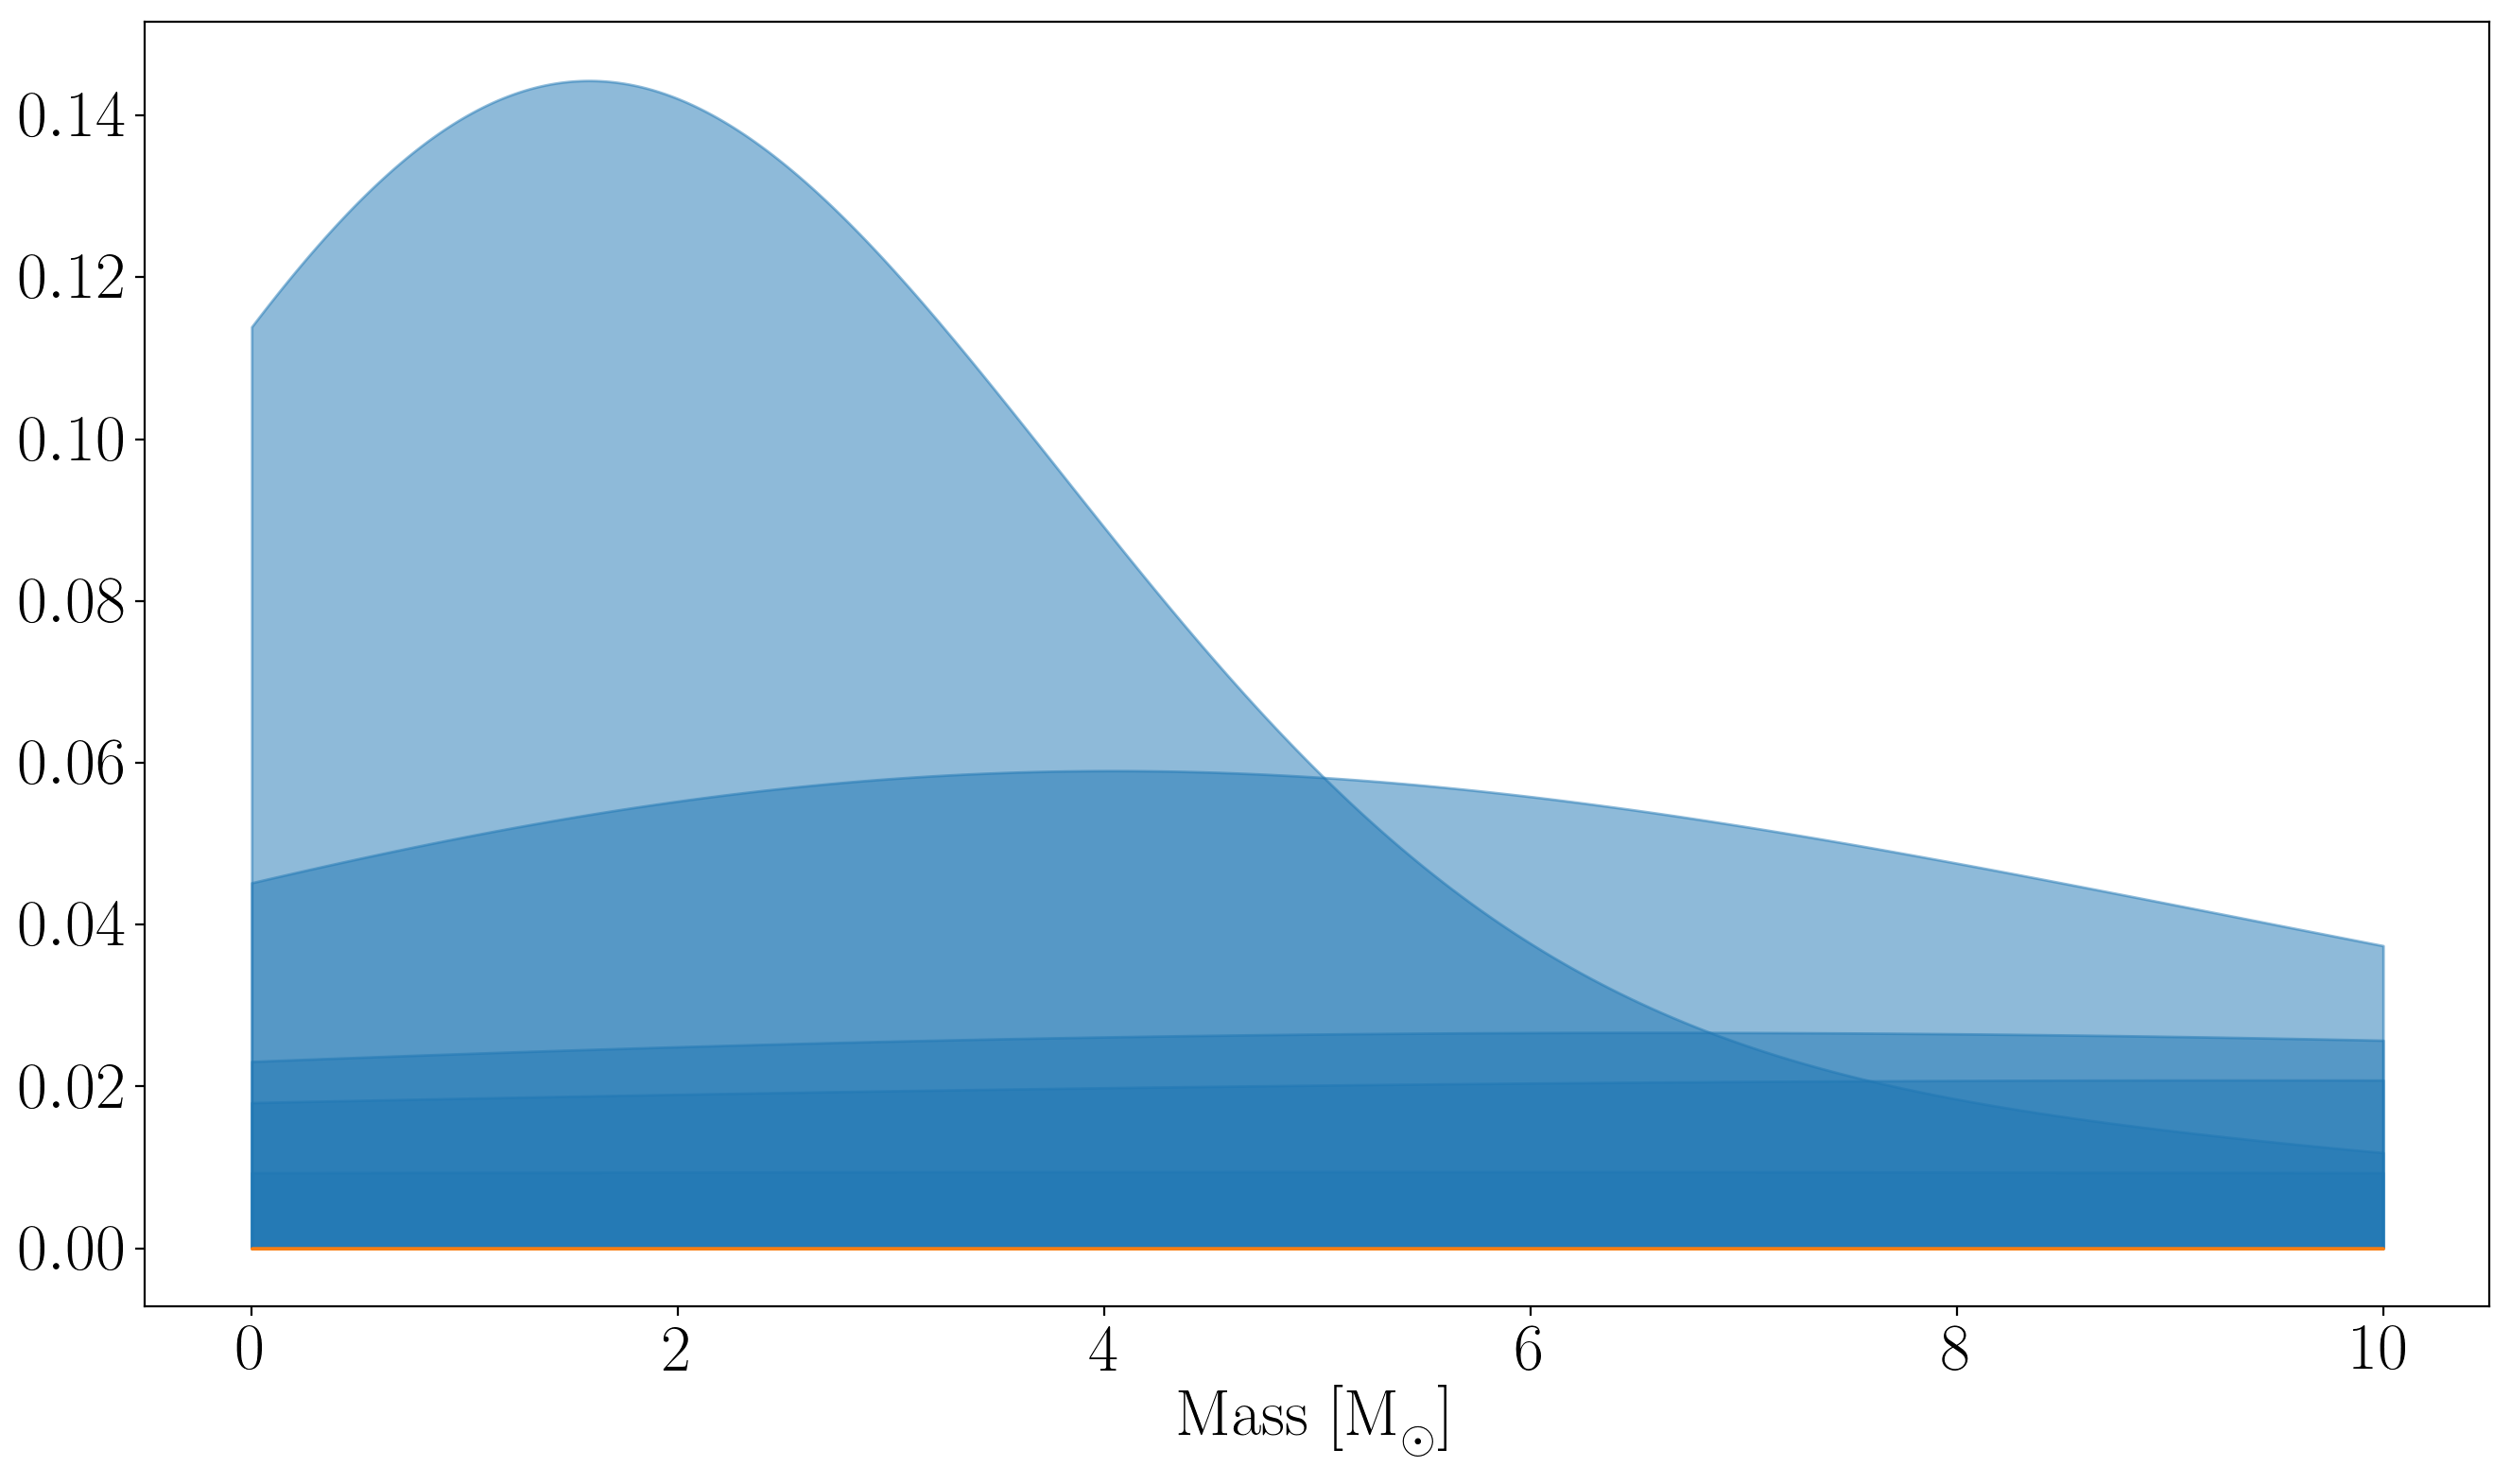

In [36]:
xs = np.linspace(0, 10, 1000)
plt.figure(figsize=(16, 9), dpi=200)
    
for i in trange(N):
    m_samps = mist.mass(mass_samps[i][::100], age_samps[i][::100], feh_samps[i][::100])
    print(type(m_samps[np.isfinite(m_samps)]), np.shape(m_samps[np.isfinite(m_samps)]))
    try:
        kernel = sps.gaussian_kde(m_samps[np.isfinite(m_samps)])
        plt.fill_between(xs, xs*0, kernel.evaluate(xs), alpha=.5, color="tab:blue")
    except:
        pass

for i in trange(N_iso):
    m_samps_iso = mist.mass(mass_samps_iso[i][::100], age_samps_iso[i][::100], feh_samps_iso[i][::100])
    try:
        kernel_iso = sps.gaussian_kde(np.exp(m_samps_iso[np.isfinite(m_samps_iso)]))
        plt.fill_between(xs, xs*0, kernel_iso.evaluate(xs), alpha=.5, color="tab:orange")
    except:
        pass
    
# plt.axvline(177, color="k")
plt.xlabel("$\mathrm{Mass~[M}_\odot]$")
# plt.xlim(150, 230)
plt.savefig("../plots/cluster_masses.pdf")

In [43]:
path = "../data/00100M.track.csv"
df = pd.read_csv(path, skiprows=11)
print(df.keys())
print(np.shape(df))

Index(['Unnamed: 0', 'star_age', 'star_mass', 'star_mdot', 'he_core_mass',
       'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH',
       'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g',
       'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot',
       'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit',
       'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit',
       'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf',
       'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7',
       'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13',
       'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20',
       'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32',
       'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T',
       'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma',
       'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14',
    

(0, 3)

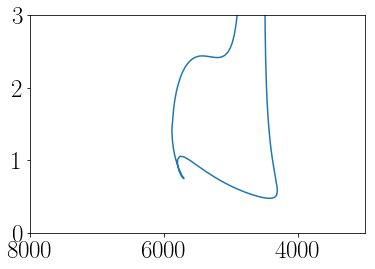

In [42]:
plt.plot(10**(df.log_Teff), 10**(df.log_L))
plt.xlim(8000, 3000)
plt.ylim(0, 3)